=== Image Convolution Filter Demo ===

Loaded image: /content/ZeldaColor.bmp
RGB shape: (576, 787, 3)
Grayscale shape: (576, 787)

Generated 10 filters:
- Average 3x3
- Average 5x5
- Sobel X
- Sobel Y
- Sharpen
- Edge
- Gaussian 3x3
- Laplacian
- Random 3x3
- Random 5x5

Processing grayscale image...
Applied Average 3x3 to grayscale
Applied Average 5x5 to grayscale
Applied Sobel X to grayscale
Applied Sobel Y to grayscale
Applied Sharpen to grayscale
Applied Edge to grayscale
Applied Gaussian 3x3 to grayscale
Applied Laplacian to grayscale
Applied Random 3x3 to grayscale
Applied Random 5x5 to grayscale

Processing RGB image...
Applied Average 3x3 to RGB
Applied Average 5x5 to RGB
Applied Sobel X to RGB
Applied Sobel Y to RGB
Applied Sharpen to RGB
Applied Edge to RGB
Applied Gaussian 3x3 to RGB
Applied Laplacian to RGB
Applied Random 3x3 to RGB
Applied Random 5x5 to RGB

Displaying results...


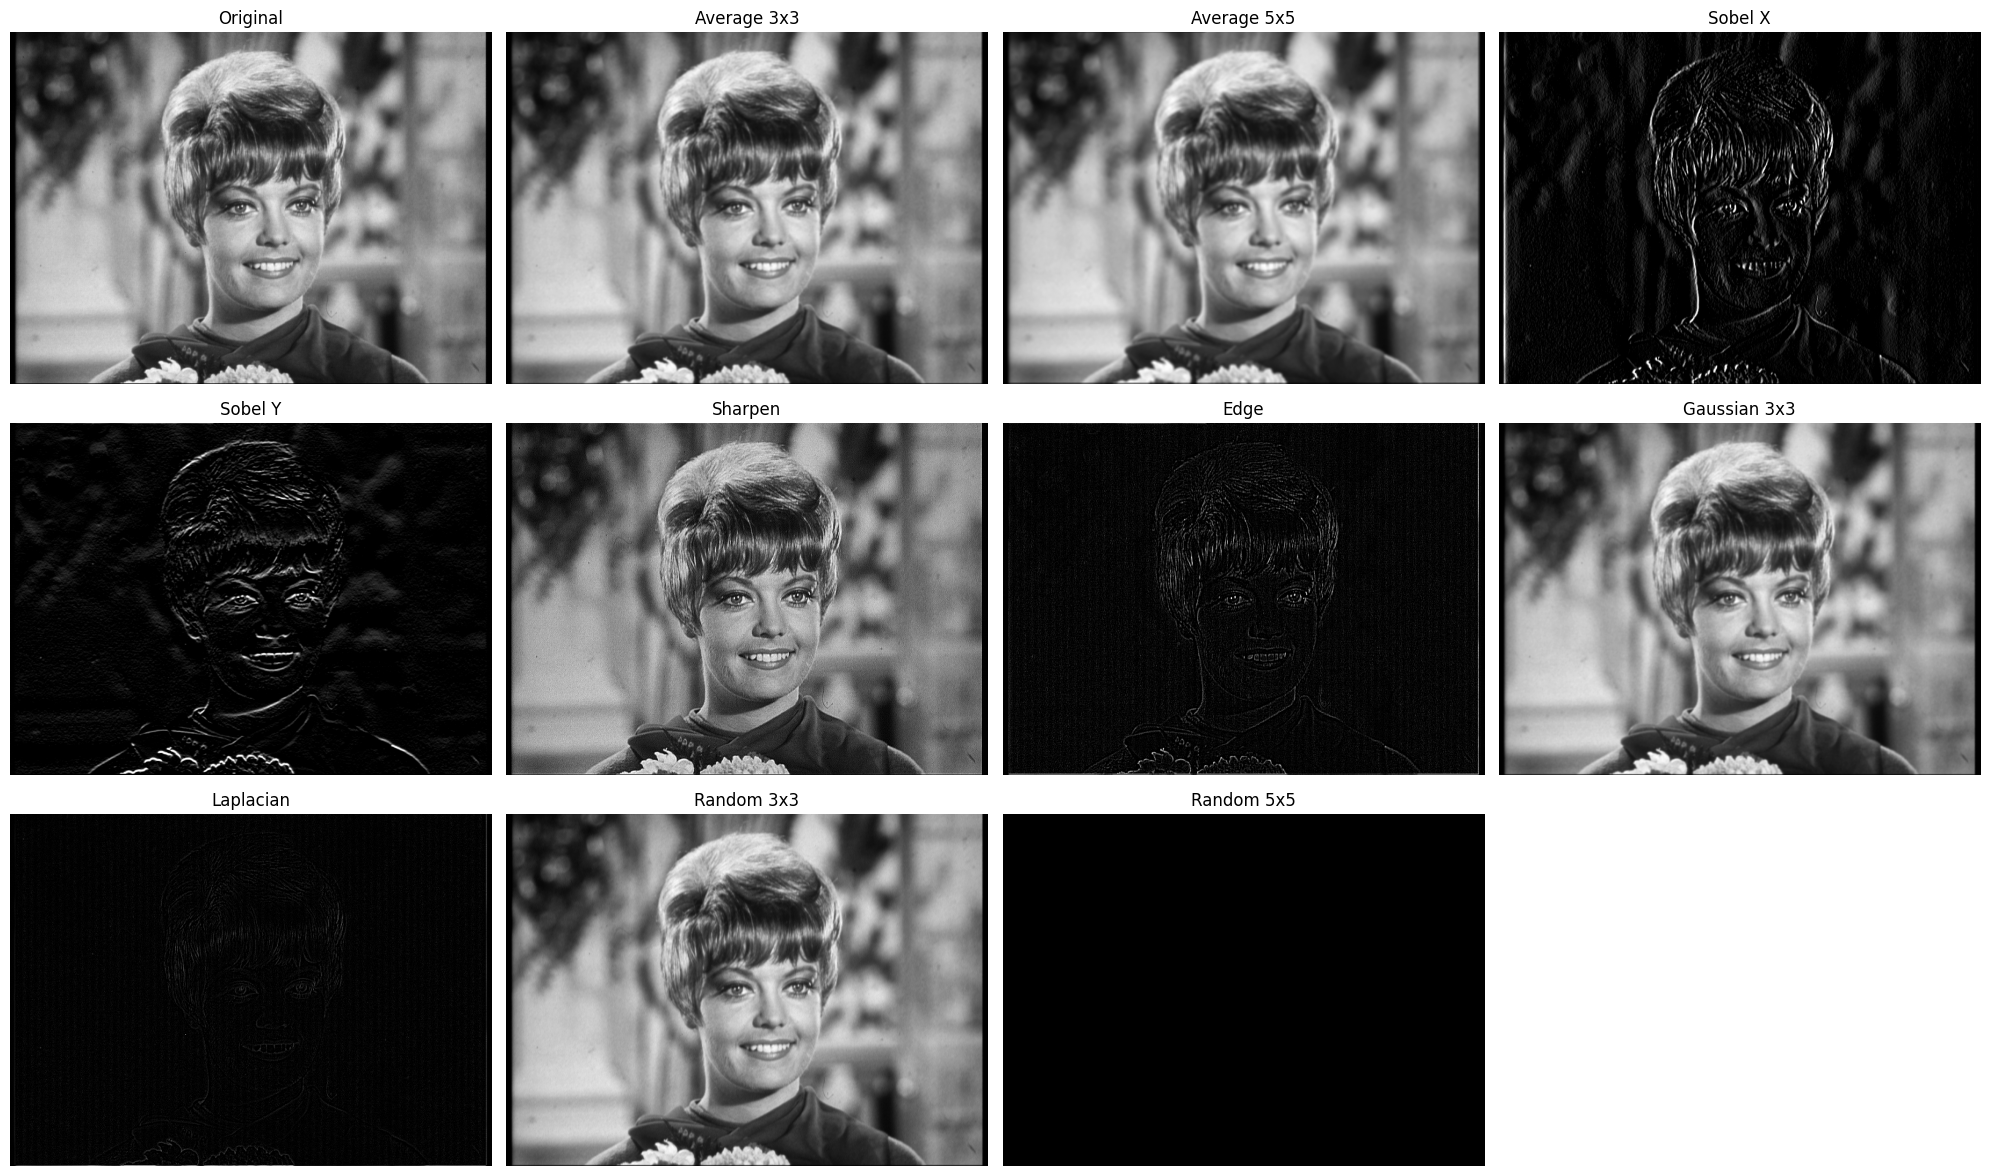

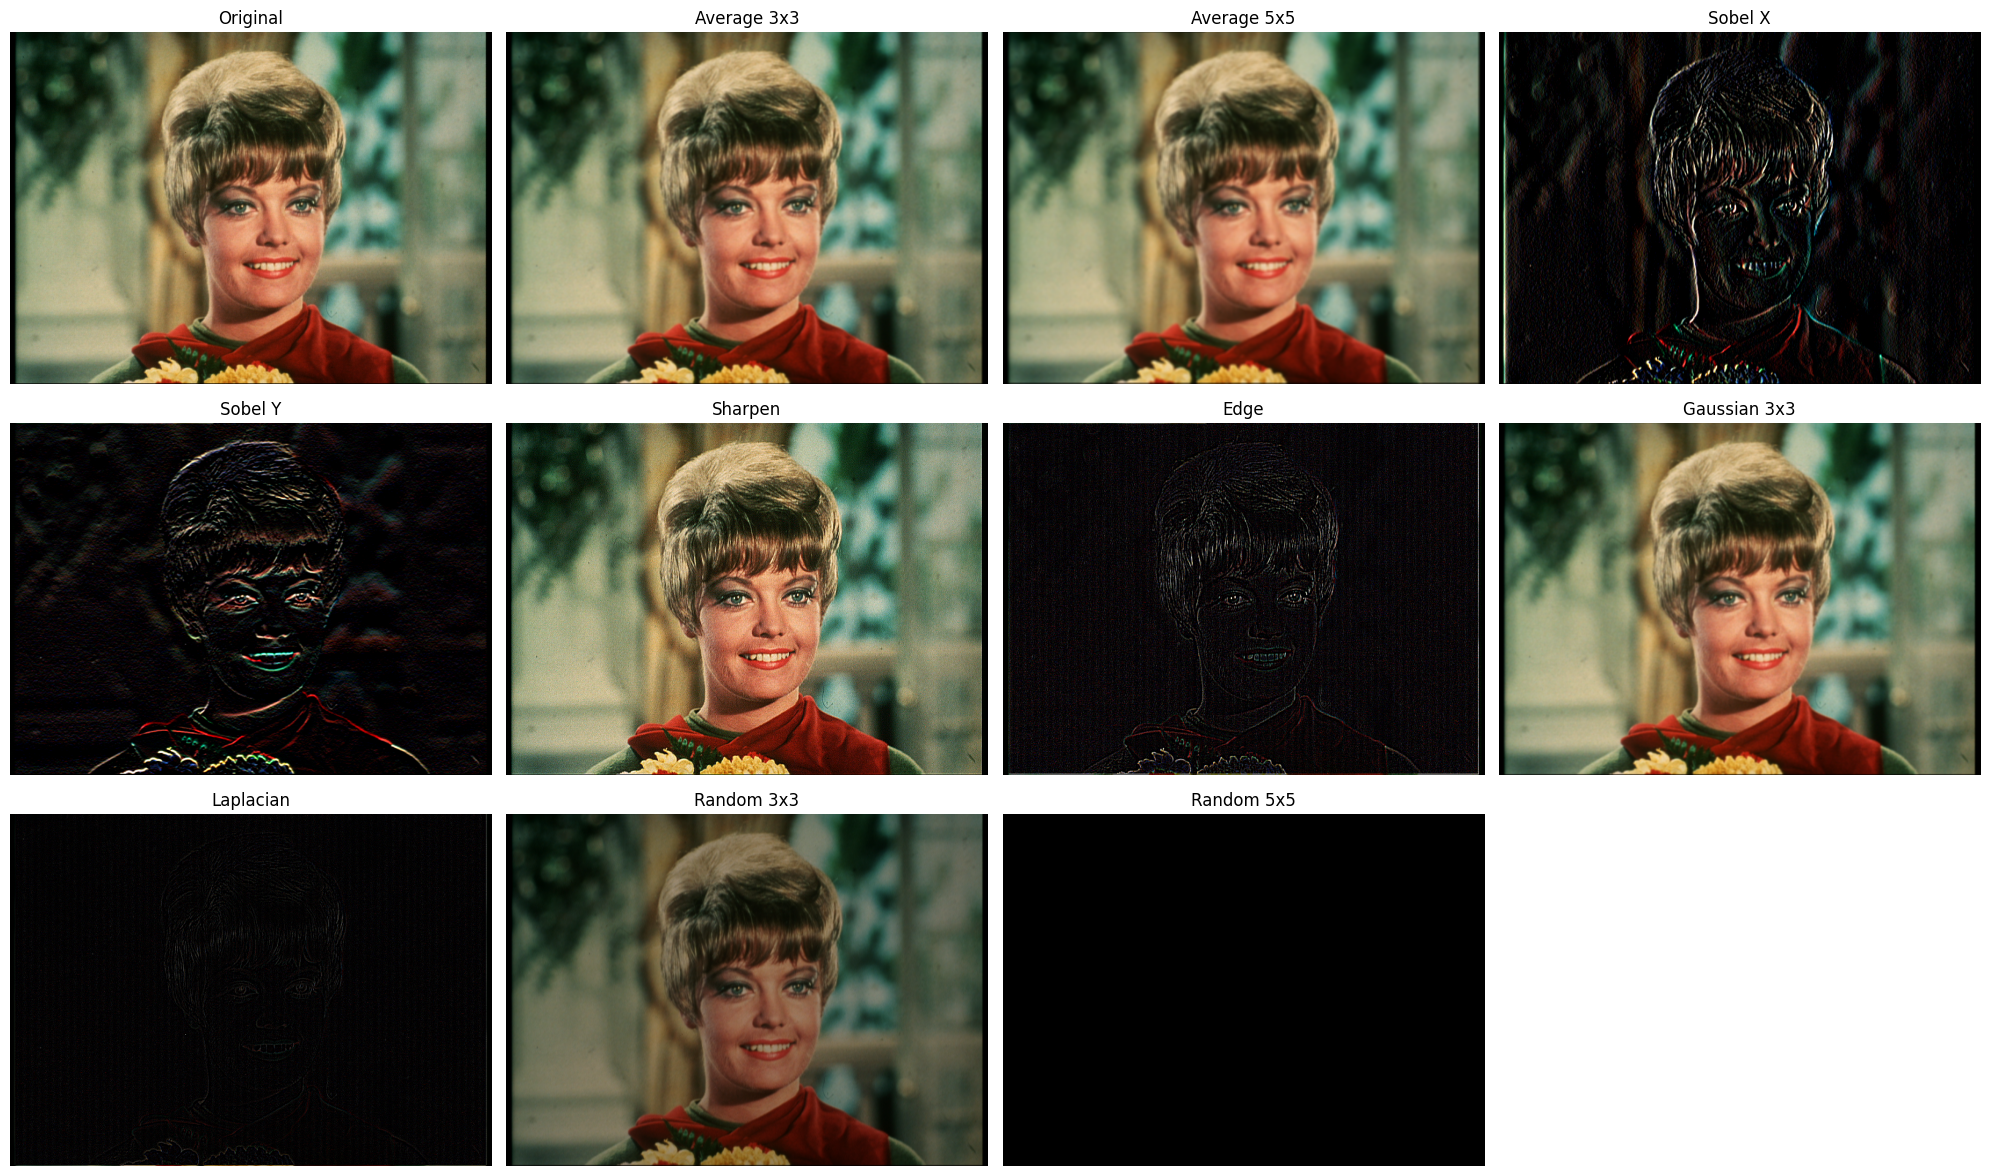


Saving results...
Saved images with prefix 'gray'
Saved images with prefix 'rgb'

Sobel Filter Analysis...


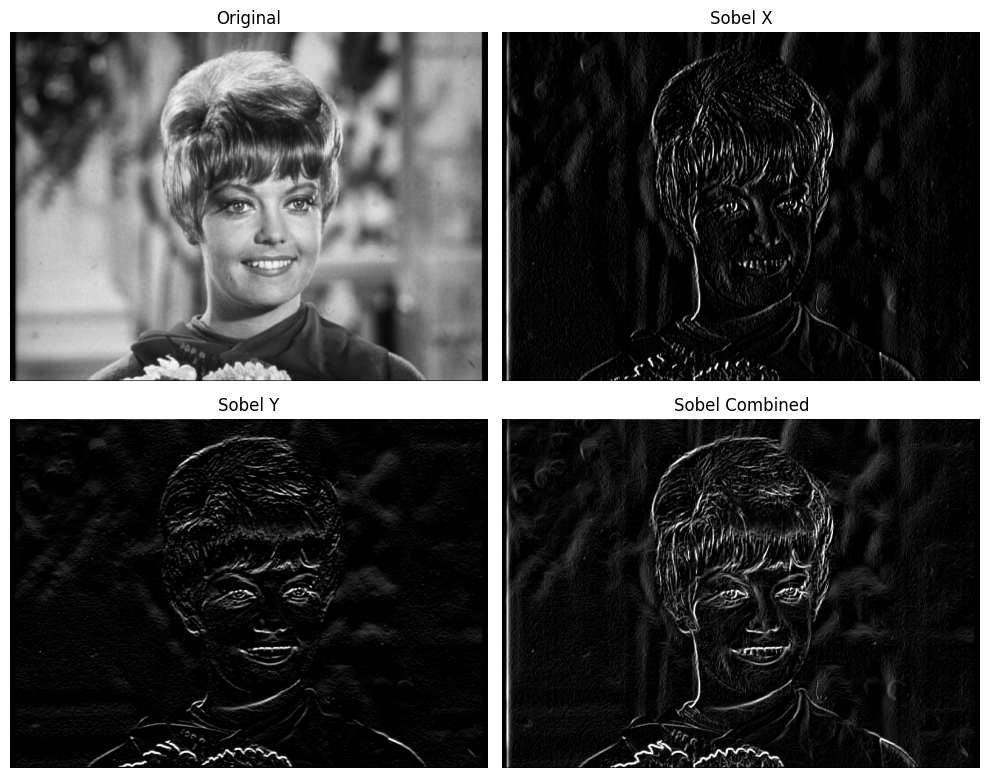

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import os

def load_image(file_path, mode='all'):
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    img_color = cv2.imread(file_path)
    if img_color is None:
        raise ValueError(f"Failed to load image: {file_path}")

    img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
    img_gray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        raise ValueError(f"Failed to load grayscale image: {file_path}")

    if mode == 'gray':
        assert img_gray.ndim == 2, "Grayscale image must be 2D"
        return img_gray
    elif mode == 'rgb':
        assert img_rgb.ndim == 3 and img_rgb.shape[2] == 3, "RGB image must be 3D with 3 channels"
        return img_rgb
    return img_rgb, img_gray

def apply_filter(channel, kernel):
    assert channel.ndim == 2, "Input channel must be 2D"
    assert kernel.ndim == 2, "Kernel must be 2D"
    assert channel.shape[0] >= kernel.shape[0], "Image height too small for kernel"
    assert channel.shape[1] >= kernel.shape[1], "Image width too small for kernel"

    h, w = channel.shape
    kh, kw = kernel.shape
    ph, pw = kh // 2, kw // 2

    padded = np.pad(channel, ((ph, ph), (pw, pw)), mode='edge')
    result = np.zeros_like(channel, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            patch = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(patch * kernel)

    return result

def process_image(img, kernel):
    assert isinstance(img, np.ndarray), "Image must be a NumPy array"
    assert isinstance(kernel, np.ndarray), "Kernel must be a NumPy array"
    assert kernel.ndim == 2, "Kernel must be 2D"
    assert kernel.shape[0] == kernel.shape[1], "Kernel must be square"
    assert kernel.shape[0] % 2 == 1, "Kernel size must be odd"

    if img.ndim == 3:
        assert img.shape[2] == 3, "RGB image must have 3 channels"
        result = np.zeros_like(img, dtype=np.float32)
        for c in range(3):
            result[:, :, c] = apply_filter(img[:, :, c], kernel)
    else:
        result = apply_filter(img, kernel)

    return np.clip(result, 0, 255).astype(np.uint8)

def show_results(image_collection, title="Processed Images", columns=3):
    count = len(image_collection)
    rows = (count + columns - 1) // columns
    plt.figure(figsize=(columns * 5, rows * 4))

    for idx, (name, img) in enumerate(image_collection.items(), 1):
        plt.subplot(rows, columns, idx)
        plt.title(name)
        cmap = 'gray' if img.ndim == 2 else None
        plt.imshow(img, cmap=cmap)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def generate_filters():
    filters = {
        'Average 3x3': np.ones((3, 3)) / 9,
        'Average 5x5': np.ones((5, 5)) / 25,
        'Sobel X': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
        'Sobel Y': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
        'Sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
        'Edge': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
        'Gaussian 3x3': np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16,
        'Laplacian': np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    }

    np.random.seed(42)
    for size in [3, 5]:
        rand_filter = np.random.randn(size, size)
        rand_filter /= np.sum(np.abs(rand_filter))
        filters[f'Random {size}x{size}'] = rand_filter

    return filters

def fetch_sample_image():
    url = "https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png"
    filename = "sample.png"
    if not os.path.exists(filename):
        try:
            urlretrieve(url, filename)
            print(f"Downloaded sample image: {filename}")
        except:
            print("Failed to download sample image.")
            return None
    return filename

def save_images(images, prefix='output'):
    for name, img in images.items():
        safe_name = name.lower().replace(' ', '_')
        path = f"{prefix}_{safe_name}.jpg"
        if img.ndim == 3:
            cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        else:
            cv2.imwrite(path, img)
    print(f"Saved images with prefix '{prefix}'")

def run():
    print("=== Image Convolution Filter Demo ===\n")

    image_path = "/content/ZeldaColor.bmp"
    if not os.path.exists(image_path):
        image_path = fetch_sample_image()
        if image_path is None:
            print("Please provide an image named 'sample.png'.")
            return

    try:
        color_img, gray_img = load_image(image_path)
        print(f"Loaded image: {image_path}")
        print(f"RGB shape: {color_img.shape}")
        print(f"Grayscale shape: {gray_img.shape}")
    except Exception as e:
        print(f"Image loading error: {e}")
        return

    filters = generate_filters()
    print(f"\nGenerated {len(filters)} filters:")
    for name in filters:
        print(f"- {name}")

    gray_outputs = {'Original': gray_img}
    color_outputs = {'Original': color_img}

    print("\nProcessing grayscale image...")
    for name, kernel in filters.items():
        try:
            gray_outputs[name] = process_image(gray_img, kernel)
            print(f"Applied {name} to grayscale")
        except Exception as e:
            print(f"Error with {name} on grayscale: {e}")

    print("\nProcessing RGB image...")
    for name, kernel in filters.items():
        try:
            color_outputs[name] = process_image(color_img, kernel)
            print(f"Applied {name} to RGB")
        except Exception as e:
            print(f"Error with {name} on RGB: {e}")

    print("\nDisplaying results...")
    show_results(gray_outputs, "Grayscale Results", 4)
    show_results(color_outputs, "RGB Results", 4)

    print("\nSaving results...")
    save_images(gray_outputs, 'gray')
    save_images(color_outputs, 'rgb')

    print("\nSobel Filter Analysis...")
    sobel_results = {
        'Original': gray_img,
        'Sobel X': gray_outputs['Sobel X'],
        'Sobel Y': gray_outputs['Sobel Y']
    }
    sobel_combined = np.sqrt(
        gray_outputs['Sobel X'].astype(np.float32)**2 +
        gray_outputs['Sobel Y'].astype(np.float32)**2
    )
    sobel_results['Sobel Combined'] = np.clip(sobel_combined, 0, 255).astype(np.uint8)
    show_results(sobel_results, "Sobel Analysis", 2)

if __name__ == "__main__":
    run()